In [37]:
# importing libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# reading data from teh dataset file
data = pd.read_csv("dataset.csv", index_col=False)

In [39]:
# Converting data to data frame
df = pd.DataFrame(data)
df

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158
...,...,...
295,0.615160,3.892790
296,0.524208,15.616094
297,0.647608,4.596190
298,0.410353,18.160583


In [40]:
# Splitting data into training and test data set.
l_80 = int(0.8*len(df))
data_train = df.iloc[:l_80]
data_test = df.iloc[l_80:]

In [41]:
# Converting data into numpy array and storing them into their respective axis
x_train, y_train = np.array(data_train.Humidity), np.array(data_train.Temperature)
x_test, y_test = np.array(data_test.Humidity), np.array(data_test.Temperature)

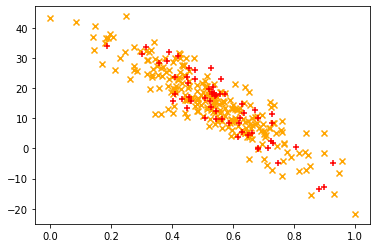

In [42]:
# ploting train and test data
plt.scatter(x_train, y_train, marker="x", color="orange")
plt.scatter(x_test, y_test, marker="+", color="red")
plt.show()

# Linear regression using gradient descent method
resource for formula's used in this: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [43]:
# Creating theta
np.random.seed(2)
theta = np.random.rand(2, 1)
# theta[0] is intercept and theta[1] = slpoe

In [44]:
# Creating Hypothesis
def hypothesis(x, theta):
    # y = slope*x + intercept
    return theta[1] * x + theta[0]

In [45]:
# Creating a function to draw
def draw(x, y, theta):
    plt.scatter(x, y)
    axes = plt.gca()
    x_val = np.array(axes.get_xlim())
    y_val = hypothesis(x_val, theta)
    plt.plot(x_val, y_val, "--", color="orange")

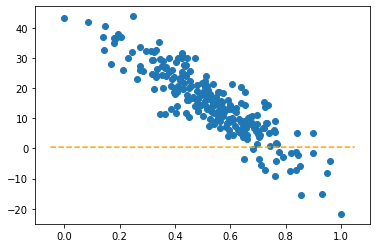

In [46]:
draw(x_train, y_train, theta)

In [47]:
# creating loss function
def loss(x, y, theta):
    m = len(x)
    return (1/m) * np.sum((y-hypothesis(x, theta))**2)

In [48]:
loss(x_test, y_test, theta)

303.91795388796817

In [49]:
# Creating gradient_descent
def gradient_descent(x, y, theta, a = 0.01):
    _loss = loss(x, y, theta)
    old = 1
    new = 0
    while old != new:
        old = _loss
        m = len(x)
        theta_0 = theta[0] - a * ((-2/m) * np.sum(y-hypothesis(x, theta)))
        theta_1 = theta[1] - a * ((-2/m) * np.sum((x* (y-hypothesis(x, theta)))))
        theta[0], theta[1] = theta_0, theta_1
        _loss = loss(x, y, theta)
        new = _loss

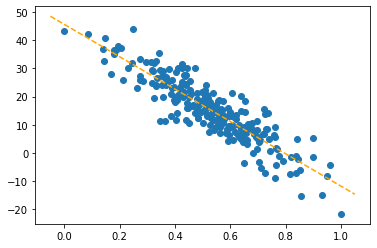

In [50]:
# running gradient_descent function and ploting the graph after the changes
gradient_descent(x_train, y_train, theta)
draw(x_train, y_train, theta)

In [51]:
# error function
def error(x, y, slope, intercept):
    predict = slope*x+intercept
    return abs(y-predict)

In [52]:
# calculating average error
m = len(x_test)
s = 0
for i in range(m):
    s += error(x_test[i], y_test[i], theta[1], theta[0])
s/m

array([4.40948896])

# Linear regression using numpy

In [53]:
# numpu.polyfit returns the slope and intercept of the line
slope, intercept = np.polyfit(x_train, y_train, 1)
slope, intercept

(-57.454656012914, 45.63529660850467)

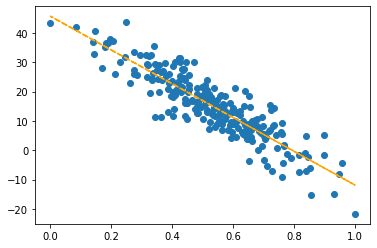

In [54]:
# ploting the slope
y = slope * x_train + intercept
plt.scatter(x_train, y_train)
plt.plot(x_train, y, "--", color='orange')
plt.show()

In [55]:
# error function
def error(x, y, slope, intercept):
    predict = slope*x+intercept
    return abs(y-predict)

In [56]:
# calculating average error
s = 0
for i in range(len(x_test)):
    s+=error(x_test[i], y_test[i], slope, intercept)
s/len(x_test)

4.409488576743114